### Importing required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

### Loading dataset

In [2]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df['itemDescription'].nunique()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


167

In [4]:
x= df['itemDescription'].value_counts().sort_values(ascending=False)[:10]
x

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [5]:
df.isnull().sum()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

### Convert the dataset into a suitable format for both algorithms: List

In [6]:
# Converting the transactions into lists

transactions = []
for i in range(df.shape[0]):
    transaction = []
    for j in range(df.shape[1]):
        if pd.notna(df.iloc[i,j]):
            transaction.append(df.iloc[i,j])
    transactions.append(transaction)
    print(transaction)
# transactions=[]
# for index,row in df.iterrows():
#     transactions.append(row.dropna().tolist())

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1808, '21-07-2015', 'tropical fruit']
[2552, '05-01-2015', 'whole milk']
[2300, '19-09-2015', 'pip fruit']
[1187, '12-12-2015', 'other vegetables']
[3037, '01-02-2015', 'whole milk']
[4941, '14-02-2015', 'rolls/buns']
[4501, '08-05-2015', 'other vegetables']
[3803, '23-12-2015', 'pot plants']
[2762, '20-03-2015', 'whole milk']
[4119, '12-02-2015', 'tropical fruit']
[1340, '24-02-2015', 'citrus fruit']
[2193, '14-04-2015', 'beef']
[1997, '21-07-2015', 'frankfurter']
[4546, '03-09-2015', 'chicken']
[4736, '21-07-2015', 'butter']
[1959, '30-03-2015', 'fruit/vegetable juice']
[1974, '03-05-2015', 'packaged fruit/vegetables']
[2421, '02-09-2015', 'chocolate']
[1513, '03-08-2015', 'specialty bar']
[1905, '07-07-2015', 'other vegetables']
[2810, '08-09-2015', 'butter milk']
[2867, '12-11-2015', 'whole milk']
[3962, '18-09-2015', 'tropical fruit']
[1088, '30-11-2015', 'tropical fruit']
[4976, '17-07-2015', 'bottled water']
[4056, '12-06-2015', 'yogurt']
[3611, '13-02-2015', 'sausage']
[1420, 

In [7]:
# creating a new column: quantity
df['Quantity']=1
df.head()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1


### Encoding transactions

In [8]:
# encoding the transaction to binary
encoded = pd.get_dummies(pd.DataFrame(transactions).stack()).sum(level=0)
transactionsdf=(encoded>0).astype(int)

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Multithreading:

In [9]:
# Creating threads
apicompleted= threading.Event()
fpcompleted= threading.Event()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#initializing execution time
exetime=[0,0]

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Algorithm Implementation:

In [11]:
# Defining function to run threads
def runapi():
    stime=time.time()
    apiresults = apriori(transactionsdf, min_support=min_support, use_colnames=True)
    exetime[0]=time.time()-stime
    apicompleted.set()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
def runfp():
    stime=time.time()
    fpresults = fpgrowth(transactionsdf, min_support=min_support, use_colnames=True)
    exetime[1]=time.time()-stime
    fpcompleted.set()
    
#colunames=True gives item name in place for columns otherwise it shows as numericals

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Function to mine association rules from frequent itemsets
def mine_association_rules(itemsets, min_confidence):
    rules = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Allowing user to set minimum support and confidence
if __name__ == "__main__":
    min_support = float(input("Enter the minimum support: "))
    min_confidence = float(input("Enter the minimum confidence: "))

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the minimum support: 0.04
Enter the minimum confidence: 0.05


### Parallel Execution:

In [15]:
# Create threads for FP-growth and Apriori algorithms
apithread = threading.Thread(target=runapi)
fpthread = threading.Thread(target=runfp)

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Start the threads
apithread.start()
fpthread.start()
apicompleted.wait()
fpcompleted.wait()

# Wait for both threads to finish
apithread.join()
fpthread.join()

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\PRIYANSHU\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\PRIYANSHU\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Data Visualization and Recommendation

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


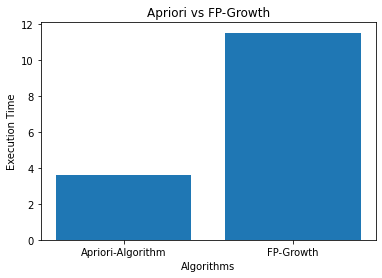

Apriori is Faster, hence it is recommended to be used


In [17]:
# Plotting to see the execution time comparision
algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel("Algorithms")
plt.ylabel("Execution Time")
plt.title('Apriori vs FP-Growth')
plt.show()
if exetime[0]<exetime[1]:
    print("Apriori is Faster, hence it is recommended to be used")
elif exetime[0]>exetime[1]:
    print("FP Growth is Faster, hence it is recommended to be used")
else:
    print("Both are equal, any algorithm can be used")

#### From the above visualization, it can be infered that Apriori performs better on this dataset than FP-growth.
- There are many reasons for this to happen, ranging from the environment, memory-usage, hardware, minimum thresholds, etc.
- Apriori usually performs poorer with huge datasets, the results are contradictory for our dataset